Задание 1.
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = boston.data
target = boston.target
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X = pd.DataFrame(data,columns = feature_names)
y = pd.DataFrame(target, columns = ['price'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.291339,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.333810,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.400723,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.391278,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.322701,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [10]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912


In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components = 2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

In [14]:
from matplotlib import pyplot as plt

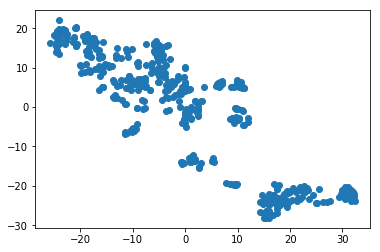

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2.
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [18]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

Text(20,-15,'Кластер 2')

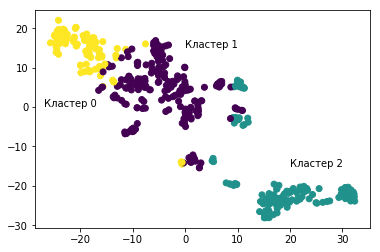

In [20]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.text(-27,0, 'Кластер 0')
plt.text(0,15, 'Кластер 1')
plt.text(20,-15, 'Кластер 2')

Кластер 0

In [21]:
y_train[labels_train == 0].mean(), X_train.loc[labels_train == 0, 'CRIM'].mean()

(price    24.971204
 dtype: float64, 0.42098554973821983)

Кластер 1

In [22]:
y_train[labels_train == 1].mean(), X_train.loc[labels_train == 1, 'CRIM'].mean()

(price    16.179688
 dtype: float64, 10.637094062500003)

Кластер 2

In [23]:
y_train[labels_train == 2].mean(), X_train.loc[labels_train == 2, 'CRIM'].mean()

(price    27.874118
 dtype: float64, 0.0721184705882353)

* Задание 3.
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [25]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

0    46
1    35
2    21
dtype: int64

Кластер 0

In [32]:
y_test[labels_test == 0].mean(), X_test.loc[labels_test == 0, 'CRIM'].mean()

(price    21.926087
 dtype: float64, 0.27973608695652175)

Кластер 1

In [33]:
y_test[labels_test == 1].mean(), X_test.loc[labels_test == 1, 'CRIM'].mean()

(price    16.437143
 dtype: float64, 10.165531142857143)

Кластер 2

In [34]:
y_test[labels_test == 2].mean(), X_test.loc[labels_test == 2, 'CRIM'].mean()

(price    28.947619
 dtype: float64, 0.08072)